In [4]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 15

frequencies = [5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(80)
domain.add_substrate(sapphire)
domain.add_layer(60e-9,gold)
domain.set_interface_condu(1,4.47e7)
domain.set_layer_param(1,kt=33.6,kp=33.6)
model = FourierModelFDTR(domain,4.05e-6,4.05e-6)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-9,gold)
domain.set_layer_param(1,kt=33.6,kp=33.6)
domain.set_interface_condu(1,4.47e7)
model = FourierModelFDTR(domain,4.05e-6,4.05e-6)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))




{'thickness': 0.001, 'temperature': 80, 'material': <pyFDTR.materials.sapphire object at 0x7f4ede961090>, 'cp': 96885.63840000003, 'density': 3970000.0, 'kt': 670.2924687620913, 'kp': 670.2924687620913}
{'temperature': 80, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 44700000.0}
{'thickness': 6e-08, 'temperature': 80, 'material': <pyFDTR.materials.gold object at 0x7f4ede9611b0>, 'cp': 1977922.01038336, 'density': 19300000.0, 'kt': 33.6, 'kp': 33.6}
{'thickness': 0.001, 'temperature': 300, 'material': <pyFDTR.materials.sapphire object at 0x7f4edea16d70>, 'cp': 3074092.9, 'density': 3970000.0, 'kt': 33.15190107105972, 'kp': 33.15190107105972}
{'temperature': 300, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 44700000.0}
{'thickness': 6e-08, 'temperature': 300, 'material': <pyFDTR.materials.gold object at 0x7f4ee0df28f0>, 'cp': 2494334.686, 'density': 19300000.0, 'kt': 33.6, 'kp': 33.6}


In [5]:
load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

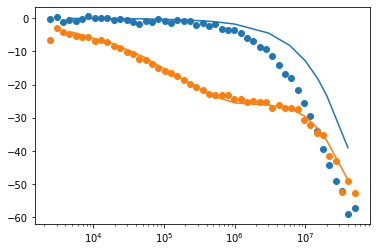

In [6]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_80);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_300);  # Plot some data on the axes.
ax.scatter(points80k[:,0],points80k[:,1])
ax.scatter(points300k[:,0],points300k[:,1])